In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [17]:
file_path = "movie_statistic_dataset.csv" 
df = pd.read_csv(file_path)

print(df.info())
print(df.describe())

print(df.isnull().sum())

df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_title           4380 non-null   object 
 1   production_date       4380 non-null   object 
 2   genres                4380 non-null   object 
 3   runtime_minutes       4380 non-null   float64
 4   director_name         4380 non-null   object 
 5   director_professions  4380 non-null   object 
 6   director_birthYear    4380 non-null   object 
 7   director_deathYear    4380 non-null   object 
 8   movie_averageRating   4380 non-null   float64
 9   movie_numerOfVotes    4380 non-null   float64
 10  approval_Index        4380 non-null   float64
 11  Production budget $   4380 non-null   int64  
 12  Domestic gross $      4380 non-null   int64  
 13  Worldwide gross $     4380 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 479.2+ KB
None
       r

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,Avatar: The Way of Water,2022-12-09,"Action,Adventure,Fantasy",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,7.061101,460000000,667830256,2265935552
1,Avengers: Endgame,2019-04-23,"Action,Adventure,Drama",181.0,-,-,-,-,8.4,1143642.0,8.489533,400000000,858373000,2794731755
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,"Action,Adventure,Fantasy",137.0,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763.0,6.272064,379000000,241071802,1045713802
3,Avengers: Age of Ultron,2015-04-22,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,"writer,producer,director",1964,alive,7.3,870573.0,7.214013,365000000,459005868,1395316979
4,Avengers: Infinity War,2018-04-25,"Action,Adventure,Sci-Fi",149.0,-,-,-,-,8.4,1091968.0,8.460958,300000000,678815482,2048359754


In [19]:
#Select relevant numeric features
features = ["Production budget $", "runtime_minutes", "movie_averageRating", "approval_Index", "movie_numerOfVotes"]
target = "Worldwide gross $"

#Log transformation to handle skewness
df["log_budget"] = np.log1p(df["Production budget $"])
df["log_revenue"] = np.log1p(df["Worldwide gross $"])
df["log_votes"] = np.log1p(df["movie_numerOfVotes"])  # Transform votes as well

#remove extreme outliers (movies with revenue > 1B)
df = df[df["Worldwide gross $"] < 1_000_000_000]

X = df[["log_budget", "runtime_minutes", "movie_averageRating", "approval_Index", "log_votes"]]
y = df["log_revenue"]


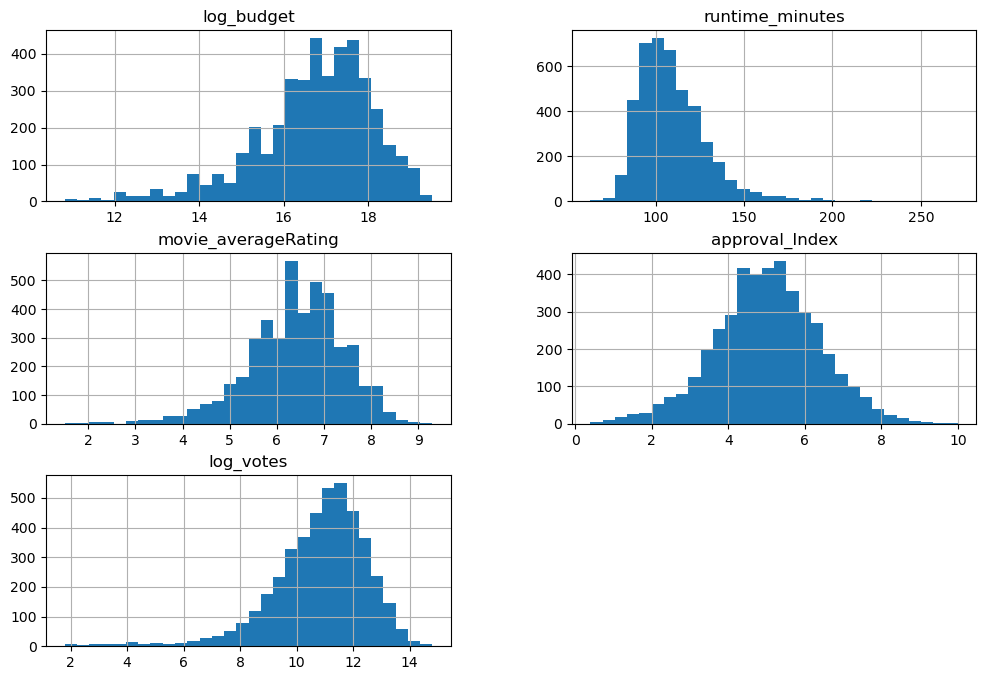

C:\Users\dduun\AppData\Local\Temp\ipykernel_4108\195389961.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")


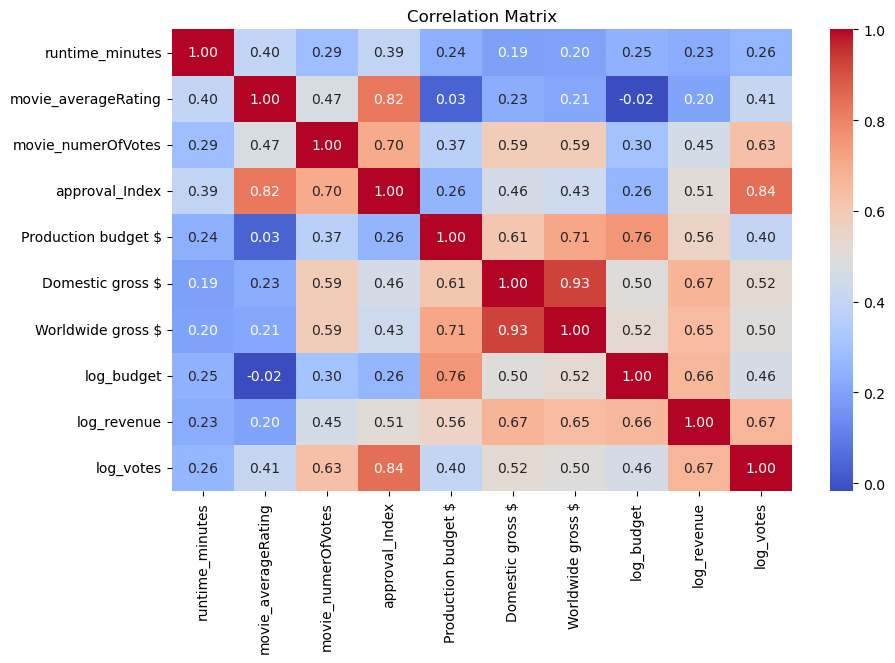

In [22]:
#Histograms of key numeric features
X.hist(figsize=(12, 8), bins=30)
plt.show()

#Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [23]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
#Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

#predictions
y_pred_lr = lr_model.predict(X_test)

#Evaluate Linear Regression
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression Results:")
print(f"MAE: {mae_lr:.2f}")
print(f"MSE: {mse_lr:.2f}")
print(f"R² Score: {r2_lr:.2f}")


Linear Regression Results:
MAE: 0.81
MSE: 1.34
R² Score: 0.68


In [31]:
#Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#Predictions
y_pred_rf = rf_model.predict(X_test)

#Evaluate Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Results:")
print(f"MAE: {mae_rf:.2f}")
print(f"MSE: {mse_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")


Random Forest Results:
MAE: 0.76
MSE: 1.17
R² Score: 0.72


In [32]:
#Grid Search for Hyperparameter Tuning
param_grid = {"n_estimators": [100, 200], "max_depth": [10, 20, None]}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring="r2", n_jobs=-1)
grid_search.fit(X_train, y_train)

#Best model
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

#Evaluate best Random Forest model
r2_best_rf = r2_score(y_test, y_pred_best_rf)
print(f"Best Tuned Random Forest R² Score: {r2_best_rf:.2f}")


Best Tuned Random Forest R² Score: 0.73


In [33]:
#example movie data for prediction
new_movie = [[np.log1p(200_000_000), 130, 7.5, 6.8, np.log1p(500_000)]]  # $200M budget, 130 min, 7.5 rating, 500K votes

#predict revenue
predicted_revenue = np.expm1(best_rf_model.predict(new_movie)[0])
print(f"Predicted Worldwide Revenue: ${predicted_revenue:,.2f}")


Predicted Worldwide Revenue: $565,898,632.08


C:\Users\dduun\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
